<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Correlation**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform exploratory data analysis (EDA). You will examine the distribution of the data, identify outliers, and determine the correlation between different columns in the dataset.


## Objectives


In this lab, you will perform the following:


- Identify the distribution of compensation data in the dataset.

- Remove outliers to refine the dataset.

- Identify correlations between various features in the dataset.


## Hands on Lab


##### Step 1: Install and Import Required Libraries


In [1]:
# Install the necessary libraries
!pip install pandas
!pip install matplotlib
!pip install seaborn

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### Step 2: Load the Dataset


In [2]:
# Load the dataset from the given URL
file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
df = pd.read_csv(file_url)

# Display the first few rows to understand the structure of the dataset
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


<h3>Step 3: Analyze and Visualize Compensation Distribution</h3>


**Task**: Plot the distribution and histogram for `ConvertedCompYearly` to examine the spread of yearly compensation among respondents.


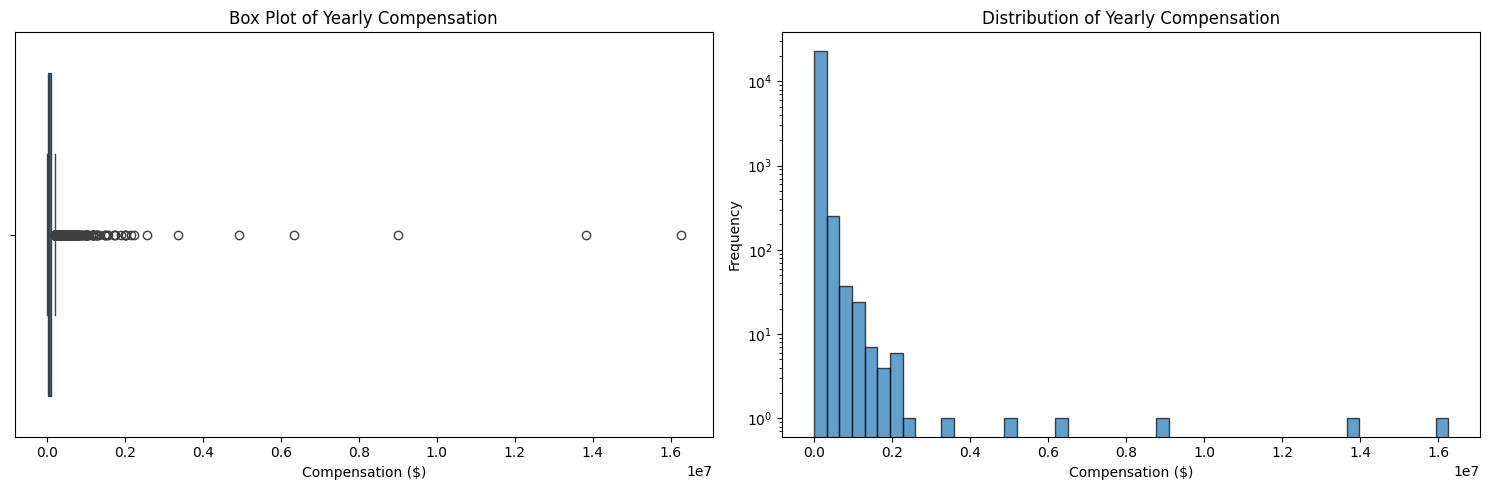

Compensation Statistics:
count    2.343500e+04
mean     8.615529e+04
std      1.867570e+05
min      1.000000e+00
25%      3.271200e+04
50%      6.500000e+04
75%      1.079715e+05
max      1.625660e+07
Name: ConvertedCompYearly, dtype: float64


In [3]:
# Step 3: Analyze and Visualize Compensation Distribution
plt.figure(figsize=(15, 5))

# Subplot 1: Box plot
plt.subplot(1, 2, 1)
sns.boxplot(x=df['ConvertedCompYearly'])
plt.title('Box Plot of Yearly Compensation')
plt.xlabel('Compensation ($)')

# Subplot 2: Histogram
plt.subplot(1, 2, 2)
plt.hist(df['ConvertedCompYearly'].dropna(), bins=50, edgecolor='black', alpha=0.7)
plt.title('Distribution of Yearly Compensation')
plt.xlabel('Compensation ($)')
plt.ylabel('Frequency')
plt.yscale('log')  # Use log scale for better visualization due to outliers

plt.tight_layout()
plt.show()

# Display basic statistics
print("Compensation Statistics:")
print(df['ConvertedCompYearly'].describe())

<h3>Step 4: Calculate Median Compensation for Full-Time Employees</h3>


**Task**: Filter the data to calculate the median compensation for respondents whose employment status is "Employed, full-time."


In [4]:
# Step 4: Calculate Median Compensation for Full-Time Employees
full_time_employees = df[df['Employment'] == 'Employed, full-time']
median_full_time_comp = full_time_employees['ConvertedCompYearly'].median()

print(f"Number of full-time employees: {len(full_time_employees)}")
print(f"Median compensation for full-time employees: ${median_full_time_comp:,.2f}")

# Additional insight: Compare with overall median
overall_median = df['ConvertedCompYearly'].median()
print(f"Overall median compensation: ${overall_median:,.2f}")
print(f"Difference: ${median_full_time_comp - overall_median:,.2f}")

Number of full-time employees: 39041
Median compensation for full-time employees: $69,814.00
Overall median compensation: $65,000.00
Difference: $4,814.00


<h3>Step 5: Analyzing Compensation Range and Distribution by Country</h3>


Explore the range of compensation in the ConvertedCompYearly column by analyzing differences across countries. Use box plots to compare the compensation distributions for each country to identify variations and anomalies within each region, providing insights into global compensation trends.



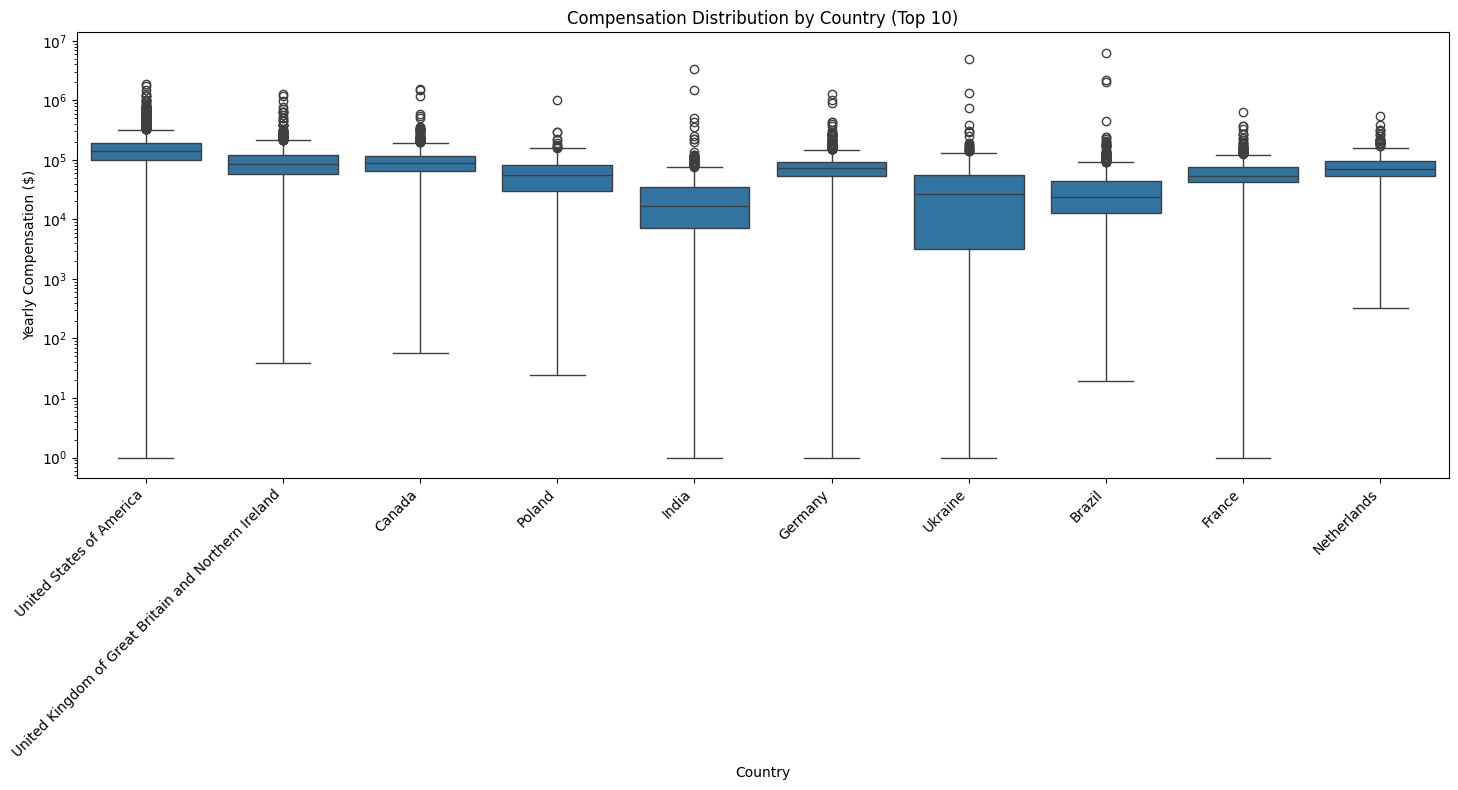

Median Compensation by Country (Top 10):
Country
United States of America                                143000.0
Canada                                                   87231.0
United Kingdom of Great Britain and Northern Ireland     84076.0
Germany                                                  73036.0
Netherlands                                              69814.0
Poland                                                   55535.5
France                                                   53703.0
Ukraine                                                  26903.5
Brazil                                                   23945.0
India                                                    16749.0
Name: ConvertedCompYearly, dtype: float64


In [5]:
# Step 5: Analyzing Compensation Range and Distribution by Country
# Get top 10 countries by number of respondents
top_countries = df['Country'].value_counts().head(10).index

# Filter data for top countries
df_top_countries = df[df['Country'].isin(top_countries)]

plt.figure(figsize=(15, 8))
sns.boxplot(x='Country', y='ConvertedCompYearly', data=df_top_countries)
plt.title('Compensation Distribution by Country (Top 10)')
plt.xlabel('Country')
plt.ylabel('Yearly Compensation ($)')
plt.xticks(rotation=45, ha='right')
plt.yscale('log')  # Use log scale due to wide compensation ranges
plt.tight_layout()
plt.show()

# Display median compensation by country
print("Median Compensation by Country (Top 10):")
country_medians = df_top_countries.groupby('Country')['ConvertedCompYearly'].median().sort_values(ascending=False)
print(country_medians)

<h3>Step 6: Removing Outliers from the Dataset</h3>


**Task**: Create a new DataFrame by removing outliers from the `ConvertedCompYearly` column to get a refined dataset for correlation analysis.


In [6]:
# Step 6: Removing Outliers from the Dataset
# Calculate IQR for outlier removal
Q1 = df['ConvertedCompYearly'].quantile(0.25)
Q3 = df['ConvertedCompYearly'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Q1: ${Q1:,.2f}")
print(f"Q3: ${Q3:,.2f}")
print(f"IQR: ${IQR:,.2f}")
print(f"Lower bound: ${lower_bound:,.2f}")
print(f"Upper bound: ${upper_bound:,.2f}")

# Remove outliers
df_clean = df[(df['ConvertedCompYearly'] >= lower_bound) & (df['ConvertedCompYearly'] <= upper_bound)].copy()

print(f"\nOriginal dataset size: {df.shape}")
print(f"Cleaned dataset size: {df_clean.shape}")
print(f"Rows removed: {df.shape[0] - df_clean.shape[0]}")

# Compare statistics
print("\nCompensation statistics before cleaning:")
print(df['ConvertedCompYearly'].describe())
print("\nCompensation statistics after cleaning:")
print(df_clean['ConvertedCompYearly'].describe())

Q1: $32,712.00
Q3: $107,971.50
IQR: $75,259.50
Lower bound: $-80,177.25
Upper bound: $220,860.75

Original dataset size: (65437, 114)
Cleaned dataset size: (22457, 114)
Rows removed: 42980

Compensation statistics before cleaning:
count    2.343500e+04
mean     8.615529e+04
std      1.867570e+05
min      1.000000e+00
25%      3.271200e+04
50%      6.500000e+04
75%      1.079715e+05
max      1.625660e+07
Name: ConvertedCompYearly, dtype: float64

Compensation statistics after cleaning:
count     22457.000000
mean      71347.201897
std       51271.396445
min           1.000000
25%       32000.000000
50%       63694.000000
75%      101281.000000
max      220207.000000
Name: ConvertedCompYearly, dtype: float64


<h3>Step 7: Finding Correlations Between Key Variables</h3>


**Task**: Calculate correlations between `ConvertedCompYearly`, `WorkExp`, and `JobSatPoints_1`. Visualize these correlations with a heatmap.


Correlation Matrix:
                     ConvertedCompYearly   WorkExp  JobSatPoints_1
ConvertedCompYearly             1.000000  0.408438       -0.058170
WorkExp                         0.408438  1.000000       -0.032388
JobSatPoints_1                 -0.058170 -0.032388        1.000000


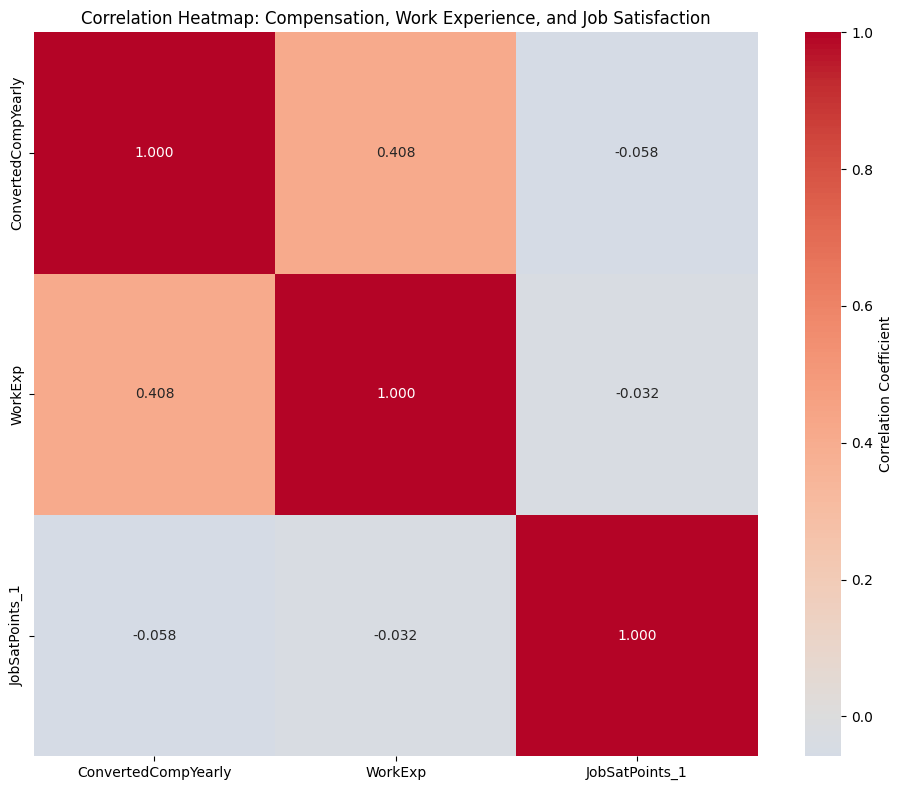

In [7]:
# Step 7: Finding Correlations Between Key Variables
# Select numerical columns for correlation analysis
numeric_columns = ['ConvertedCompYearly', 'WorkExp', 'JobSatPoints_1']
correlation_data = df_clean[numeric_columns].corr()

print("Correlation Matrix:")
print(correlation_data)

# Visualize correlations with heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_data, annot=True, cmap='coolwarm', center=0, 
            square=True, fmt='.3f', cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation Heatmap: Compensation, Work Experience, and Job Satisfaction')
plt.tight_layout()
plt.show()

<h3>Step 8: Scatter Plot for Correlations</h3>


**Task**: Create scatter plots to examine specific correlations between `ConvertedCompYearly` and `WorkExp`, as well as between `ConvertedCompYearly` and `JobSatPoints_1`.


TypeError: expected x and y to have same length

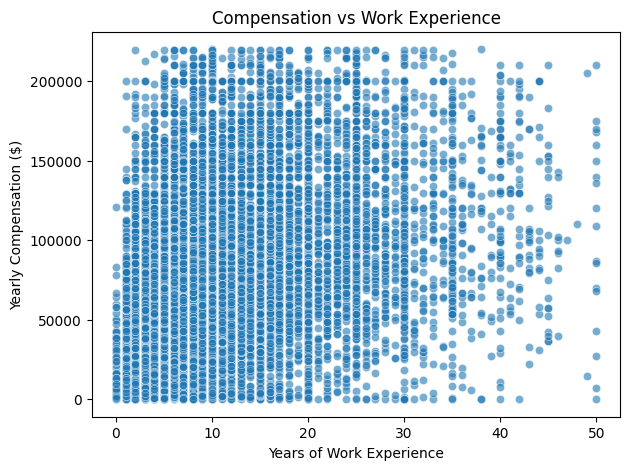

In [10]:
# Step 8: Scatter Plot for Correlations
plt.figure(figsize=(15, 5))

# Subplot 1: ConvertedCompYearly vs WorkExp
plt.subplot(1, 2, 1)
sns.scatterplot(x='WorkExp', y='ConvertedCompYearly', data=df_clean, alpha=0.6)
plt.title('Compensation vs Work Experience')
plt.xlabel('Years of Work Experience')
plt.ylabel('Yearly Compensation ($)')

# Add trend line
z = np.polyfit(df_clean['WorkExp'].dropna(), df_clean['ConvertedCompYearly'].dropna(), 1)
p = np.poly1d(z)
plt.plot(df_clean['WorkExp'].dropna(), p(df_clean['WorkExp'].dropna()), "r--", alpha=0.8)

# Subplot 2: ConvertedCompYearly vs JobSatPoints_1
plt.subplot(1, 2, 2)
sns.scatterplot(x='JobSatPoints_1', y='ConvertedCompYearly', data=df_clean, alpha=0.6)
plt.title('Compensation vs Job Satisfaction')
plt.xlabel('Job Satisfaction Points')
plt.ylabel('Yearly Compensation ($)')

# Add trend line
z = np.polyfit(df_clean['JobSatPoints_1'].dropna(), df_clean['ConvertedCompYearly'].dropna(), 1)
p = np.poly1d(z)
plt.plot(df_clean['JobSatPoints_1'].dropna(), p(df_clean['JobSatPoints_1'].dropna()), "r--", alpha=0.8)

plt.tight_layout()
plt.show()

# Calculate and display correlation coefficients
corr_workexp = df_clean['ConvertedCompYearly'].corr(df_clean['WorkExp'])
corr_jobsat = df_clean['ConvertedCompYearly'].corr(df_clean['JobSatPoints_1'])

print(f"Correlation between Compensation and Work Experience: {corr_workexp:.3f}")
print(f"Correlation between Compensation and Job Satisfaction: {corr_jobsat:.3f}")

<h3>Summary</h3>


In this lab, you practiced essential skills in correlation analysis by:

- Examining the distribution of yearly compensation with histograms and box plots.
- Detecting and removing outliers from compensation data.
- Calculating correlations between key variables such as compensation, work experience, and job satisfaction.
- Visualizing relationships with scatter plots and heatmaps to gain insights into the associations between these features.

By following these steps, you have developed a solid foundation for analyzing relationships within the dataset.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
